# Workshop # 3

In [1]:
#Import Python Libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

df = pd.read_csv("titanic-train.csv")

df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [3]:
df2 = df.loc[:,['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch']]
df2

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0
...,...,...,...,...,...,...
886,0,2,male,27.0,0,0
887,1,1,female,19.0,0,0
888,0,3,female,NaN,1,2
889,1,1,male,26.0,0,0


In [4]:
print('Age missing ', df2['Age'].isnull().sum())
print('PClass missing ', df2['Pclass'].isnull().sum())
print('SibSp missing ', df2['SibSp'].isnull().sum())
print('Parch missing ', df2['Parch'].isnull().sum())
print('Survived missing ', df2['Survived'].isnull().sum())

Age missing  177
PClass missing  0
SibSp missing  0
Parch missing  0
Survived missing  0


In [5]:
df2['Age'] = df2['Age'].fillna(df2['Age'].mean())

print('Age missing ', df2['Age'].isnull().sum())

Age missing  0


In [6]:
df2['Survived'] = df2['Survived'].astype('category')

In [7]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(df2[['Pclass','Sex','Age','SibSp','Parch']], 
                                                    df2['Survived'], 
                                                    train_size=0.7, 
                                                    random_state=123)
print("Labels for training and testing data")
print(train_X)

Labels for training and testing data
     Pclass     Sex   Age  SibSp  Parch
416       2  female  34.0      1      1
801       2  female  31.0      1      1
512       1    male  36.0      0      0
455       3    male  29.0      0      0
757       2    male  18.0      0      0
..      ...     ...   ...    ...    ...
98        2  female  34.0      0      1
322       2  female  30.0      0      0
382       3    male  32.0      0      0
365       3    male  30.0      0      0
510       3    male  29.0      0      0

[623 rows x 5 columns]


In [8]:
train_y

416    1
801    1
512    1
455    1
757    0
      ..
98     1
322    1
382    0
365    0
510    1
Name: Survived, Length: 623, dtype: category
Categories (2, int64): [0, 1]

In [13]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(["male", "female"])
list(le.classes_)
train_X['Sex'] = le.transform(train_X['Sex'])
test_X['Sex'] = le.transform(test_X['Sex'])

In [14]:
train_X

,Pclass,Sex,Age,SibSp,Parch
416,2,0,34.0,1,1
801,2,0,31.0,1,1
512,1,1,36.0,0,0
455,3,1,29.0,0,0
757,2,1,18.0,0,0
...,...,...,...,...,...
98,2,0,34.0,0,1
322,2,0,30.0,0,0
382,3,1,32.0,0,0
365,3,1,30.0,0,0


In [15]:
train_X.dtypes

Pclass      int64
Sex         int64
Age       float64
SibSp       int64
Parch       int64
dtype: object

In [16]:
train_y.dtypes

CategoricalDtype(categories=[0, 1], ordered=False)

In [17]:
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [18]:

clf= tree.DecisionTreeClassifier(max_depth=5)

clf.fit(train_X, train_y)



DecisionTreeClassifier(max_depth=5)

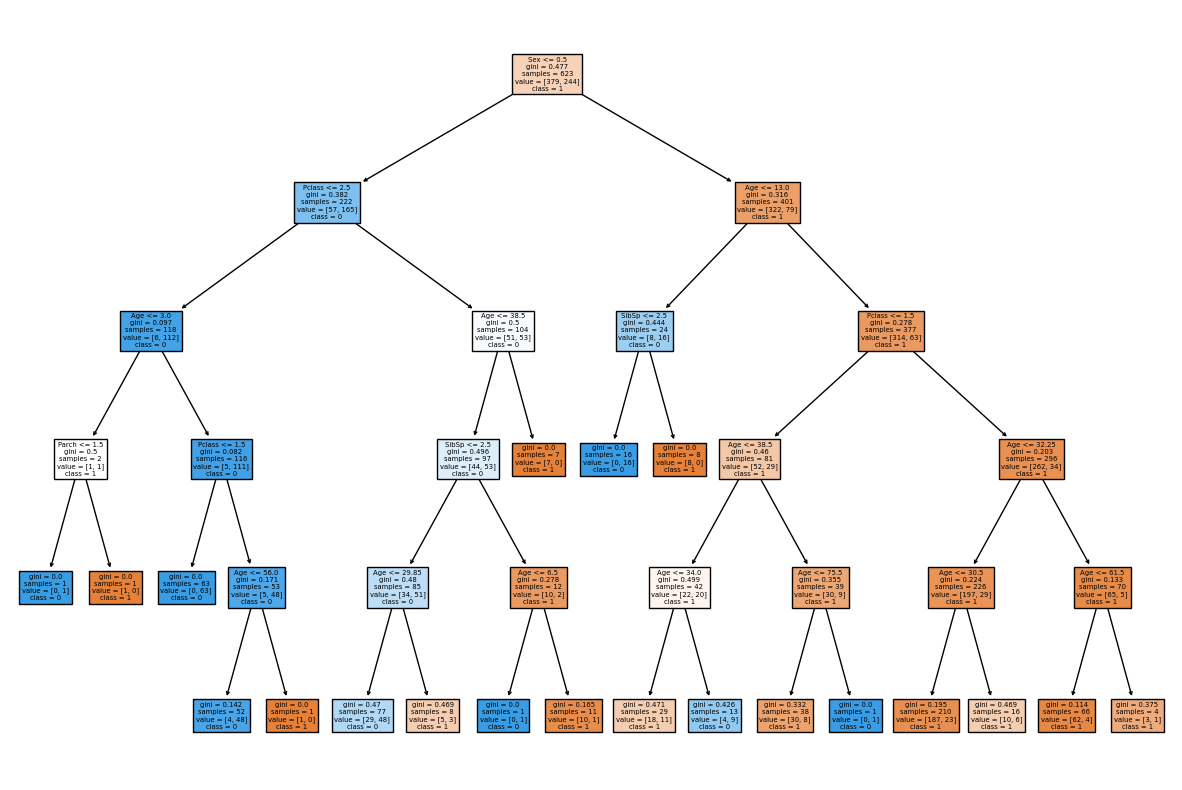

In [21]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plot_tree(clf, feature_names=train_X.columns, class_names=[str(cls) for cls in train_y.unique()], filled=True)
plt.show()


In [22]:
print("Predicting iris on the test set")

y_pred = clf.predict(test_X)

print("This model has accuracy score = ",round(accuracy_score(test_y, y_pred),4))
print(classification_report(test_y, y_pred))
print(confusion_matrix(test_y, y_pred))


Predicting iris on the test set
This model has accuracy score =  0.806
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       170
           1       0.77      0.67      0.72        98

    accuracy                           0.81       268
   macro avg       0.80      0.78      0.78       268
weighted avg       0.80      0.81      0.80       268

[[150  20]
 [ 32  66]]


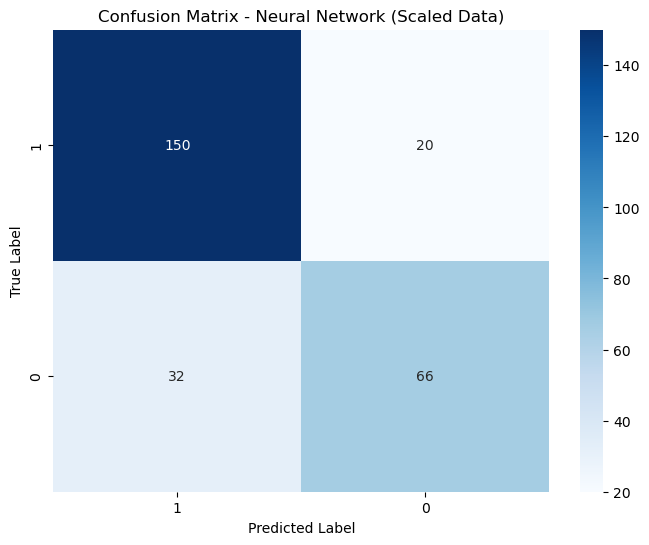

In [26]:
#import scikitplot as skplt
#skplt.metrics.plot_confusion_matrix(test_y, y_pred, normalize=True)
#plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(test_y, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=test_y.unique(), yticklabels=test_y.unique())
plt.title('Confusion Matrix - Neural Network (Scaled Data)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()